# Characteristic Radii vs $\beta$

In this notebook we will make graphs for $R_c$, $R_{90}$ and $\theta_c$ vs $\beta$ for different values of $\xi$
with  fixed inclination $(i=0)$

Equations for the characteristic radii:
\begin{align}
B &= \frac{\sqrt{3\xi}(1+\beta^{1/2})}{(1-\xi\beta)\left(1+\frac{1}{5}\xi\beta\right)^{1/2}} \\
A &= \frac{1}{1-2\gamma} \\
\gamma &= \frac{1}{6} + \frac{\beta^{1/2}}{3}\left[1+\frac{1-\beta^{1/2}}{10}-\frac{3}{40}\frac{k}{1+\beta^{1/2}}\right] \\
k &= \frac{2}{\xi}-2 \\
\tan\theta_c &= \pm\left|B^2-2A\right|^{1/2}
\end{align}

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/Users/will/anaconda/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
def A(b, xi):
    """
    Returns the radius of curvature normalized with R0

    Corrected version that also depends on anisotropy index k

    xi = 2/(k+2) => k = 2 (1/xi - 1)
    """
    k = 2*(1./xi - 1.)
    sb = np.sqrt(b)
    alpha = (1 + 2*sb*(1 + 0.1*(1 - sb) - (3./40.)*k/(1  +sb)))/6.
    return 1./(1.0-2*alpha)

In [3]:
def theta_c(beta,xi=1.0):
    """
    theta_c defines the excentricity of a given conic
    """
    Acurv = A(beta,xi)
    arg = 2*Acurv - 3*xi*(1.0 + np.sqrt(beta))**2/(1.0 - xi*beta)**2/(1 + 0.2*xi*beta)
    return np.sign(arg)*np.arctan(np.sqrt(np.abs(arg)))

In [4]:
def B(beta,xi=1.0):
    """
    Returns R_90 normalized with R_0
    """
    numerator = np.sqrt(3*xi)*(1+np.sqrt(beta))
    denominator = (1.-xi*beta)*np.sqrt(1.+0.2*xi*beta)
    return numerator/denominator

## Defining arrays for $\beta$ and $\xi$

In [6]:
beta = np.logspace(-3,-1,500)
xi = [0.1,0.2,0.4,0.6,0.8,1.0]
xcolors = sns.color_palette("gnuplot",len(xi))

### start plotting

In [20]:
sns.axes_style()

{'axes.axisbelow': True,
 'axes.edgecolor': 'white',
 'axes.facecolor': '#EAEAF2',
 'axes.grid': True,
 'axes.labelcolor': '.15',
 'axes.linewidth': 0.0,
 'figure.facecolor': 'white',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'grid.color': 'white',
 'grid.linestyle': '-',
 'image.cmap': 'Greys',
 'legend.frameon': False,
 'legend.numpoints': 1,
 'legend.scatterpoints': 1,
 'lines.solid_capstyle': 'round',
 'text.color': '.15',
 'xtick.color': '.15',
 'xtick.direction': 'out',
 'xtick.major.size': 0.0,
 'xtick.minor.size': 0.0,
 'ytick.color': '.15',
 'ytick.direction': 'out',
 'ytick.major.size': 0.0,
 'ytick.minor.size': 0.0}

### Show both radii on the same graph

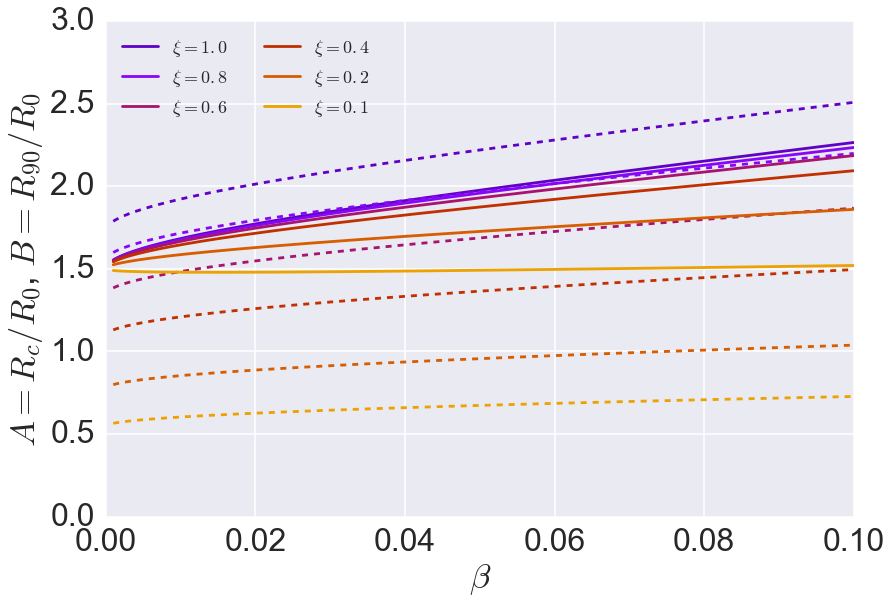

In [35]:
sns.set_context('poster', font_scale=2.0, rc={'font.size': 20})
for x,xc in zip(reversed(xi), xcolors):
    ACurv = A(beta,x)
    plt.plot(beta,ACurv,linestyle="-",color=xc,label=r"$\xi={}$".format(x))
    Bnorm = B(beta,x)
    plt.plot(beta,Bnorm,linestyle = "--",color=xc,label=None)    
plt.legend(ncol=2, loc='upper left', fontsize=18)
plt.xlabel(r"$\beta$",fontsize="xx-large")
plt.ylabel(r"$A=R_c/R_0$, $B=R_{90}/R_0$",fontsize="xx-large")
plt.ylim(0.0, None)
plt.xlim(0.0, 0.10)
plt.tight_layout()
plt.savefig("AB-beta.pdf");

#### $A$ vs $\beta$

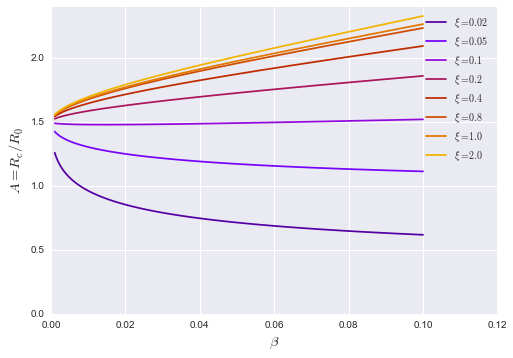

In [18]:
for x,xc in zip(xi,xcolors):
    ACurv = A(beta,x)
    plt.plot(beta,ACurv,linestyle="-",color=xc,label=r"$\xi={}$".format(x))
plt.legend()
plt.xlabel(r"$\beta$",fontsize="large")
plt.ylabel(r"$A=R_c/R_0$",fontsize="large")
plt.ylim(0.0, None)
plt.savefig("A-beta.pdf");

#### $B$ vs $\beta$

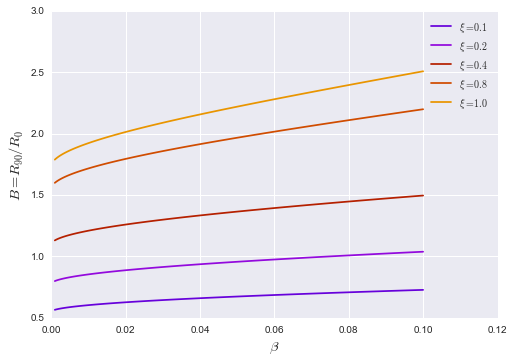

In [15]:
for x,xc in zip(xi,xcolors):
    Bnorm = B(beta,x)
    plt.plot(beta,Bnorm,linestyle = "-",color=xc,label=r"$\xi={}$".format(x))
plt.legend()
plt.xlabel(r"$\beta$",fontsize="large")
plt.ylabel(r"$B=R_{90}/R_0$",fontsize="large")
plt.savefig("B-beta.pdf");

#### $\theta_c$ vs $\beta$

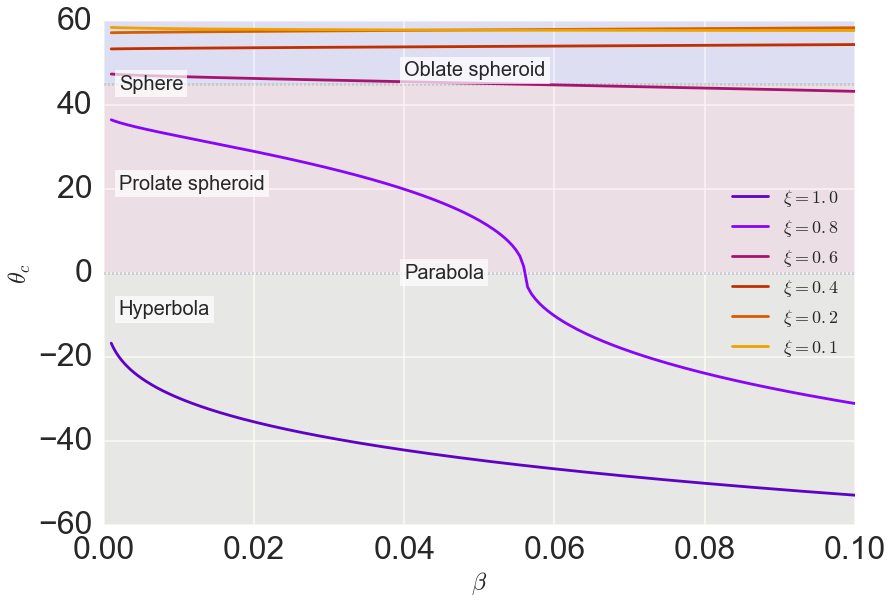

In [37]:
sns.set_context('poster', font_scale=2.0, rc={'font.size': 20})
plt.fill_between([0.0, 0.12], [-60, -60], [0, 0], color='y', alpha=0.05)
plt.fill_between([0.0, 0.12], [0, 0], [45, 45], color='r', alpha=0.05)
plt.fill_between([0.0, 0.12], [45, 45], [60, 60], color='b', alpha=0.05)
wbox=dict(facecolor='white', alpha=0.7, ec='none')
plt.text(0.04, 47.0, 'Oblate spheroid', bbox=wbox)
plt.text(0.002, 20.0, 'Prolate spheroid', bbox=wbox)
plt.text(0.002, -10.0, 'Hyperbola', bbox=wbox)
plt.plot([0.0, 0.12], [0.0, 0.0], ':', alpha=0.5)
plt.plot([0.0, 0.12], [45.0, 45.0], ':', alpha=0.5)
plt.text(0.002, 45.0, 'Sphere', va='center', bbox=wbox)
plt.text(0.04, 0.0, 'Parabola', va='center', bbox=wbox)
for x,xc in zip(reversed(xi),xcolors):
    thc = np.degrees(theta_c(beta,x))
    plt.plot(beta,thc,linestyle="-",color=xc,label=r"$\xi={}$".format(x))
plt.legend(loc='right', fontsize=18)
plt.xlabel(r"$\beta$",fontsize="large")
plt.ylabel(r"$\theta_c$",fontsize="large")
plt.xlim(0.0, 0.1)
plt.tight_layout()
plt.savefig("thc-beta.pdf");